<a href="https://colab.research.google.com/github/FajriAditiyaPutra/Orbit-Ventura/blob/main/Object%20Detection%20Haar%20Cascade%20Hands%20On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with Haar Cascade

Deteksi Objek menggunakan Haar feature-based cascade classifiers adalah metode deteksi objek yang diajukan pada tahun 2001 oleh Paul Viola dan Michael Jones dalam [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), kemudian pada tahun 2002 diteruskan oleh Rainer Lienhart dalam [paper](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

<br>

Haar Feature adalah fitur yang didasarkan pada Wavelet Haar. Wavelet Haar adalah gelombang tunggal bujur sangkar (satu interval tinggi dan satu interval rendah). 
Untuk dua dimensi, satu terang dan satu gelap. Setiap Haar-like feature terdiri dari gabungan kotak-kotak hitam dan putih.

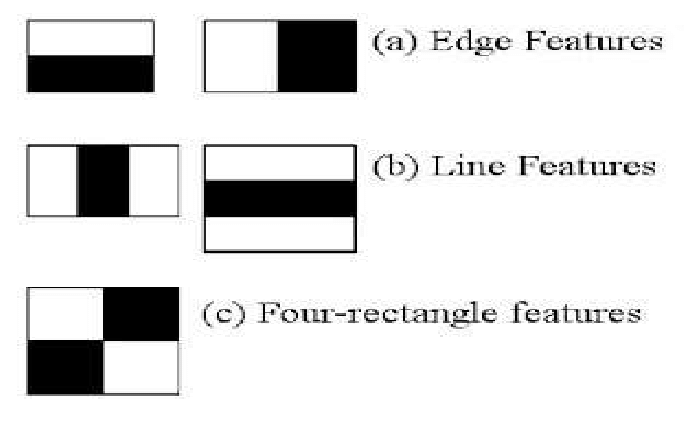

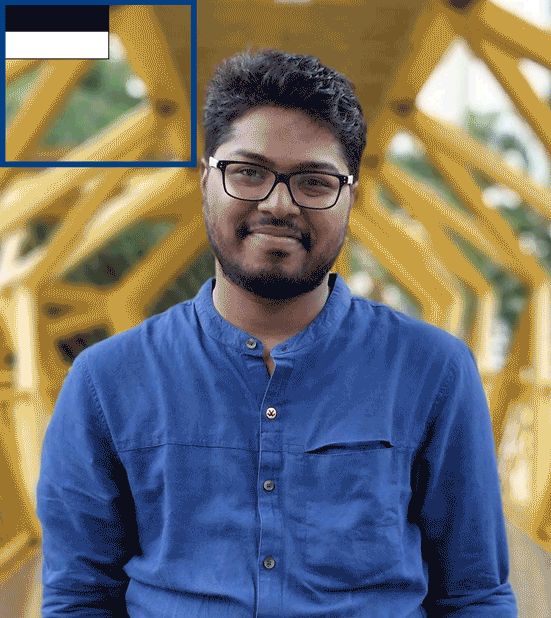

OpenCV menyediakan Cascade Classifier yang dapat diimplementasikan dengan menggunakan fungsi cv2.CascadeClassifier(). 

Jenis-jenis pre-trained model Cascade Classifier dapat ditemukan pada link github [berikut](https://github.com/opencv/opencv/tree/3.4/data).

Referensi tambahan : 

1.   [Cascade Classifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)
2.   [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)




## Download File

<br>
Download pre-trained model Haar Cascade dari Google Drive

In [ ]:
!gdown https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J 



<br>
Unzip pre-train model Haar Cascade yang sudah di download

In [ ]:
!unzip '/content/haarcascades.zip'

unzip:  cannot find or open /content/haarcascades.zip, /content/haarcascades.zip.zip or /content/haarcascades.zip.ZIP.


<br>
Download gambar foto keluarga yang akan digunakan untuk object detection

In [ ]:
!wget --no-check-certificate \
    https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg \
    -O Potrait.jpg

--2022-03-25 06:46:47--  https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg
Resolving res.klook.com (res.klook.com)... 13.226.122.118, 13.226.122.17, 13.226.122.108, ...
Connecting to res.klook.com (res.klook.com)|13.226.122.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112296 (110K) [image/jpeg]
Saving to: ‘Potrait.jpg’

Potrait.jpg         100%[===================>] 109.66K  --.-KB/s    in 0.03s   

2022-03-25 06:46:47 (4.17 MB/s) - ‘Potrait.jpg’ saved [112296/112296]



<br>
Download library tambahan dari OpenCV

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

--2022-03-25 06:46:51--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6572 (6.4K) [text/plain]
Saving to: ‘common.py’

common.py           100%[===================>]   6.42K  --.-KB/s    in 0s      

2022-03-25 06:46:51 (47.5 MB/s) - ‘common.py’ saved [6572/6572]



## Import Library

Mengimport library yang dibutuhkan yaitu :
1.   OpenCV
2.   Numpy
3.   Matplotlib dan pylab



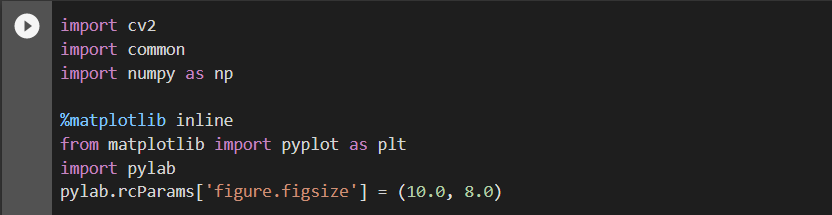

In [ ]:
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

## Read Image

Membaca dan menampilkan gambar yang sudah di download

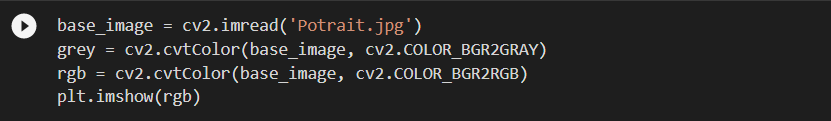

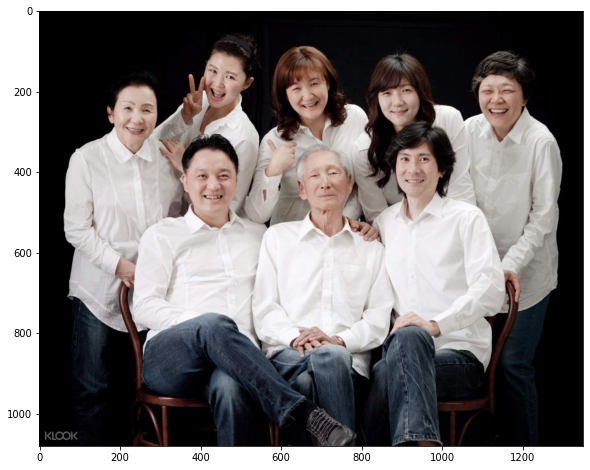

In [ ]:
base_image = cv2.imread('Potrait.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

## Face Detection



Face detection menggunakan pre-trained model haarcascade_frontalface_default.xml untuk mendeteksi wajah pada gambar.

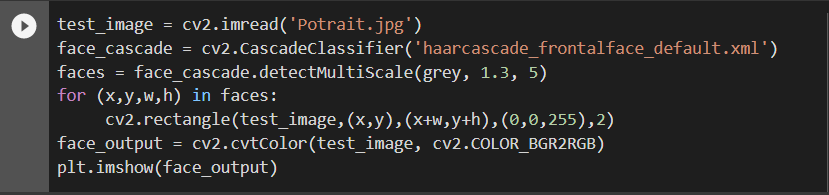

In [ ]:
test_image = cv2.imread('Potrait.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2)
face_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_output)

error: ignored

## Smile Detection


Smile detection menggunakan pre-trained model haarcascade_smile.xml untuk mendeteksi senyum pada gambar.

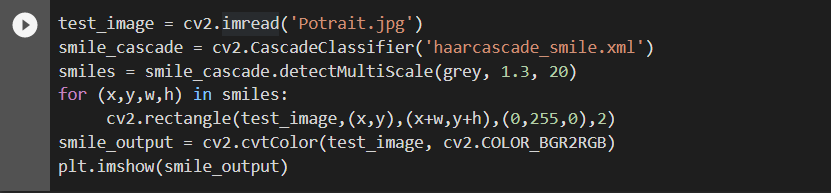

In [ ]:
test_image = cv2.imread('Potrait.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)

Pada gambar di atas terdapat False Positive, Untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan smile detection

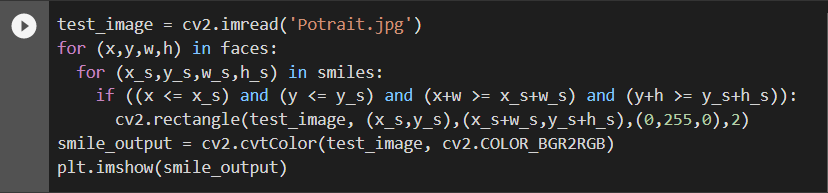

In [ ]:
test_image = cv2.imread('Potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)

## Eye Detection

Eye Detection menggunakan pre-trained model haarcascade_eye.xml untuk mendeteksi mata pada gambar.

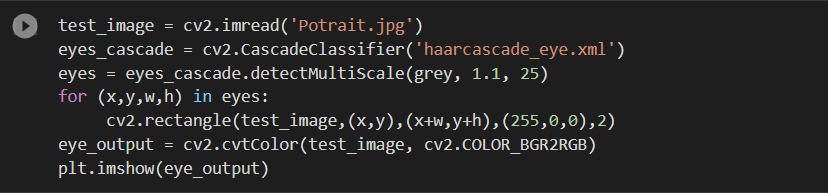

In [ ]:
test_image = cv2.imread('Potrait.jpg')
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eyes_cascade.detectMultiScale(grey, 1.1, 25)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
eye_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(eye_output)

Apabila terdapat False Positive, untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan eye detection

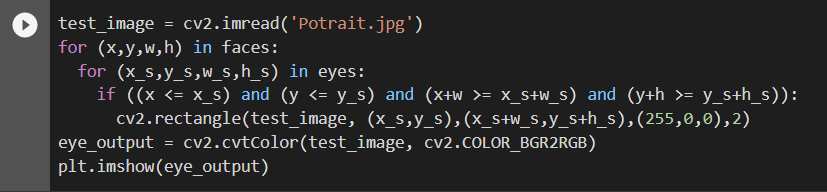

In [ ]:
test_image = cv2.imread('Potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in eyes:
    if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):   
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,0,0),2)
eye_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(eye_output)

## Menggabungkan Semuanya

Sekarang tinggal menggabungkan deteksi wajah, deteksi senyuman, dan deteksi mata.

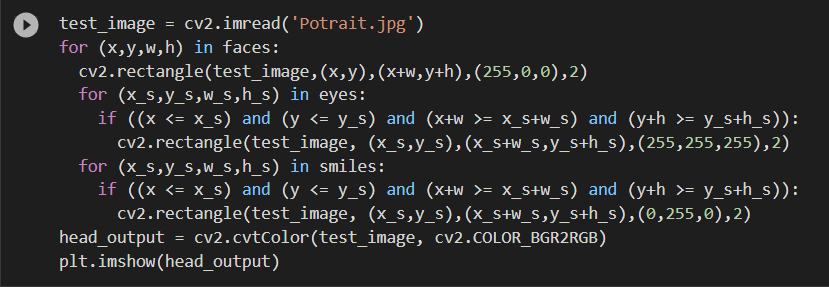

In [ ]:
test_image = cv2.imread('Potrait.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,0,0),2)
head_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(head_output)

# Latihan

## Nomer 1 : Face Detection

Download gambar dari link di bawah ini menggunakan wget.

https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg

Buatlah deteksi wajah dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi semua wajah dari gambar tersebut
<br>

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

## Nomer 2 : Plate Number Detection

Download gambar dari link di bawah ini menggunakan wget.

https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg

Buatlah deteksi plat nomor mobil dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi plat nomor dari 3 mobil terdepan 

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.